In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

torch.manual_seed(0)

In [ ]:
asd = torch.from_numpy(np.random.randn(2,3))
asd2 = torch.randn((3,2), dtype=torch.float64)

asd, asd2 , torch.matmul(asd, asd2)

(tensor([[-0.4710,  0.9707, -1.1359],
         [ 0.6825,  1.4895, -1.5900]], dtype=torch.float64),
 tensor([[ 1.5410, -0.2934],
         [-2.1788,  0.5684],
         [-1.0845, -1.3986]], dtype=torch.float64),
 tensor([[-1.6089,  2.2787],
         [-0.4693,  2.8702]], dtype=torch.float64))

In [ ]:
asd + asd2.T

tensor([[ 1.0700, -1.2081, -2.2205],
        [ 0.3890,  2.0580, -2.9886]], dtype=torch.float64)

In [ ]:
x = torch.Tensor([3]).requires_grad_(True)
print(x)

f = lambda x: 3*x**2
print(f(x))

result = f(x)
result.backward()
x.grad

tensor([3.], requires_grad=True)
tensor([27.], grad_fn=<MulBackward0>)


tensor([18.])

tensor([1, 2, 3, 4, 5]) tensor([-2.0075, 12.0729,  1.5309, 14.0562,  8.0742]) torch.Size([500]) torch.Size([500])


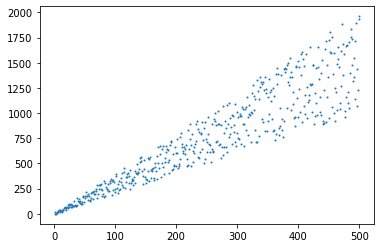

In [ ]:
torch.manual_seed(0)

xdata = torch.arange(1, 501, 1)

noise = torch.rand(500)+1
ydata = 2*xdata*noise + 5*(-1)**xdata

plt.scatter(xdata, ydata, s=1)
print(xdata[:5], ydata[:5], xdata.shape, ydata.size())

In [ ]:
torch.manual_seed(0)

class NUMdata(Dataset):
    def __init__(self):
        
        self.x = xdata.float()
        self.y = ydata.float()
        
        self.n_samples = xdata.shape[0]
        
    def __getitem__(self, index):
        
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.n_samples
        
dataset = NUMdata()
dataloader = DataLoader(dataset, batch_size=25, shuffle=True, drop_last=True)
len(dataloader)

20

In [ ]:
next(iter(dataloader))

[tensor([227., 377., 162., 124., 426., 372.,  46., 343., 269., 386., 252., 136.,
         403., 355., 170., 104.,  12.,  15.,  72., 295., 449., 359., 374.,  99.,
          17.]),
 tensor([ 514.3123, 1436.0740,  459.1925,  435.6754,  893.6622, 1379.3156,
          119.2856, 1305.6198, 1023.1273, 1548.8750,  794.3071,  399.0192,
         1013.7295, 1123.0558,  503.5272,  290.8248,   38.6412,   33.8167,
          194.6142,  813.6539, 1362.4757,  821.2489,  944.5248,  214.7717,
           52.7207])]

In [ ]:
torch.manual_seed(0)
class pred_model(nn.Module):
    def __init__(self):
        super(pred_model, self).__init__()

        self.linear_Stack = nn.Sequential(nn.Linear(1,5),
                                          nn.Linear(5,5),
                                          nn.Linear(5,1))
    def forward(self,x):

        return self.linear_Stack(x)
    
model = pred_model()
model

pred_model(
  (linear_Stack): Sequential(
    (0): Linear(in_features=1, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=5, bias=True)
    (2): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [ ]:
torch.manual_seed(0)
num_epochs = 300
total_step = len(dataloader)
lr = 1e-4

loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

for epoch in range(1,num_epochs+1):
    for i, (inputs, outputs) in enumerate(dataloader):
        
        inputs = inputs.view(inputs.size(0), -1)
        outputs = outputs.unsqueeze(-1)
        
        out = model(inputs)
        loss = loss_fn(out, outputs)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    
    if epoch%75==0:
      print(f"epoch: {epoch}/{num_epochs}, loss: {loss:.3f}")
    

epoch: 75/300, loss: 787.378
epoch: 150/300, loss: 202.568
epoch: 225/300, loss: 138.802
epoch: 300/300, loss: 108.785


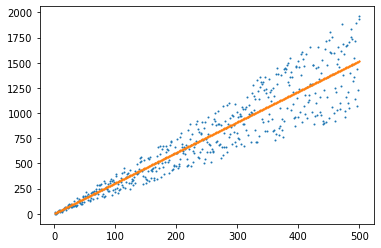

In [ ]:
model.eval()
preds = model(xdata.view(-1,1).float())

plt.scatter(xdata, ydata, s=1)
plt.scatter(xdata, preds.detach().numpy(), s=1)
